In [1]:
machine = 'mac'
machine = 'magny'


In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
%matplotlib inline

In [81]:
level = 4
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in range(127,128,1):
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True, rotate_disk=True, use_principal_axis=True, 
            euler_rotation=False,  use_cold_gas_spin=False, do_rotation=True) 

        s2, sf2 = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True, rotate_disk=False, use_principal_axis=False, 
            euler_rotation=False,  use_cold_gas_spin=False, do_rotation=False) 
        
        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
        s2.data['gmet'] = np.maximum( s2.data['gmet'], 1e-40 )

level   : 4
halo    : 24
snapnr  : 127
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 34.42281723  33.16259384  37.29567337]
Found 1783163 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]

[ 34.42281723  33.16259384  37.29567337]

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



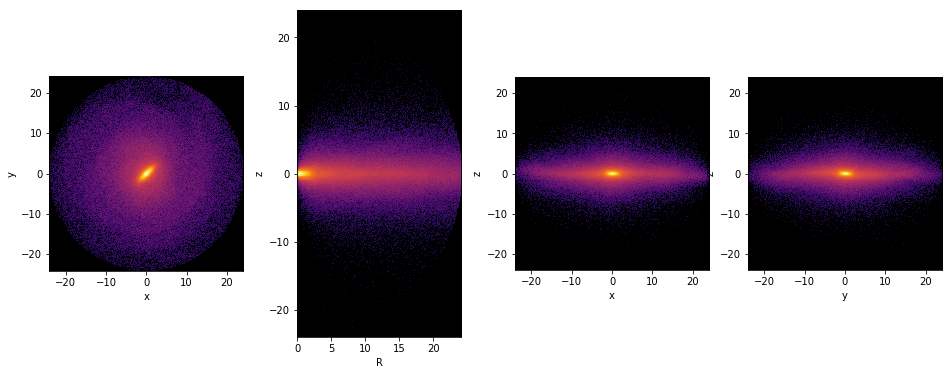

In [82]:
cmap = copy.copy(plt.cm.inferno)
cmap.set_bad((0,0,0))  # Fill background with black

istars, = np.where( (s.halo == 0) & (s.subhalo == 0) & (s.type == 4) & (s.r() < s.galrad) ) #(s.type == 4) & 
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)
(R, phi, z), (vR, vphi, vz) = get_cylindrical_vectors(s, sf, istars)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 6))
ax1.hist2d(1000*x, 1000*y, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect('equal')
ax2.hist2d(1000*rxy, 1000*z, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax2.set_xlabel("R")
ax2.set_ylabel("z")
ax2.set_aspect('equal')
ax3.hist2d(1000*x, 1000*z, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax3.set_xlabel("x")
ax3.set_ylabel("z")
ax3.set_aspect('equal')
ax4.hist2d(1000*y, 1000*z, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax4.set_xlabel("y")
ax4.set_ylabel("z")
ax4.set_aspect('equal')
#fig.show()

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


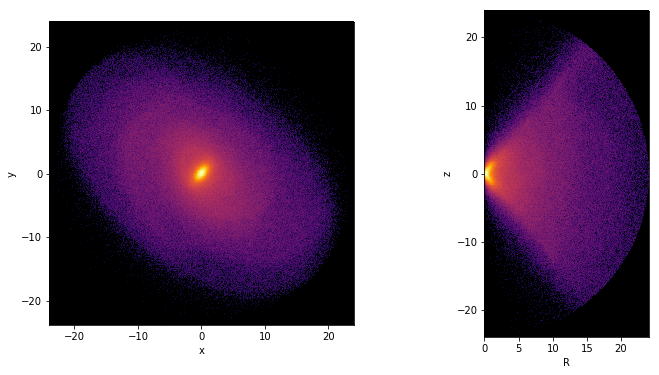

In [83]:
istars2, = np.where( (s2.type == 4) & (s2.halo == 0) & (s2.subhalo == 0) & (s2.r() < s2.galrad) )#(s2.type == 4) &
(x2, y2, z2), (vx2, vy2, vz2), rxyz2, rxy2 = get_cartesian_vectors(s2, sf2, istars2)
(R2, phi2, z2), (vR2, vphi2, vz2) = get_cylindrical_vectors(s2, sf2, istars2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist2d(1000*x2, 1000*y2, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect('equal')
ax2.hist2d(1000*rxy2, 1000*z2, bins=401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax2.set_xlabel("R")
ax2.set_ylabel("z")
ax2.set_aspect('equal')
fig.show()

In [68]:
def cm(m,i):
    cm = np.sum(m*i)/np.sum(m)
    return(cm)

def cm_frame(x, y, z, vx, vy, vz, m):
    cmx, cmy, cmz = cm(m, x), cm(m, y), cm(m, z)
    cmvx, cmvy, cmvz = cm(m, vx), cm(m, vy), cm(m, vz)
    
    xn, yn, zn = x - cmx, y - cmy, z - cmz
    vxn, vyn, vzn = vx - cmvx, vy - cmvy, vz - cmvz
    return (cmx, cmy, cmz), (cmvx, cmvy, cmvz), (xn, yn, zn), (vxn, vyn, vzn)

def momentum(m, vx, vy, vz):
    px, py, pz = m*vx, m*vy, m*vz
    return(px, py, pz)

def ang_mom(x, y, z, px, py, pz):
    Lx = np.sum(y * pz - z * py)
    Ly = np.sum(z * px - x * pz)
    Lz = np.sum(x * py - y * px)
    return(Lx, Ly, Lz)

def mom_inertia(m, x, y, z):
    Ix = np.sum(m * (y**2 + z**2))
    Iy = np.sum(m * (z**2 + x**2))
    Iz = np.sum(m * (x**2 + y**2))
    return(Ix, Iy, Iz)

In [69]:
m = s.mass[istars]
m2 = s2.mass[istars2]
(cmx, cmy, cmz), (cmvx, cmvy, cmvz), (xn, yn, zn), (vxn, vyn, vzn) = cm_frame(x, y, z, vx, vy, vz, m)
(cmx2, cmy2, cmz2), (cmvx2, cmvy2, cmvz2), (xn2, yn2, zn2), (vxn2, vyn2, vzn2) = cm_frame(x2, y2, z2, vx2, vy2, vz2, m2)

px, py, pz = momentum(m, vx, vy, vz)
px2, py2, pz2 = momentum(m2, vx2, vy2, vz2)
pxn, pyn, pzn = momentum(m, vxn, vyn, vzn)
pxn2, pyn2, pzn2 = momentum(m2, vxn2, vyn2, vzn2)

Lx, Ly, Lz = ang_mom(x, y, z, px, py, pz)
Lx2, Ly2, Lz2 = ang_mom(x2, y2, z2, px2, py2, pz2)
Lxn, Lyn, Lzn = ang_mom(xn, yn, zn, pxn, pyn, pzn)
Lxn2, Lyn2, Lzn2 = ang_mom(xn2, yn2, zn2, pxn2, pyn2, pzn2)

Ix, Iy, Iz = mom_inertia(m, x, y, z)
Ix2, Iy2, Iz2 = mom_inertia(m2, x2, y2, z2)
Ixn, Iyn, Izn = mom_inertia(m, xn, yn, zn)
Ixn2, Iyn2, Izn2 = mom_inertia(m2, xn2, yn2, zn2)
print(Lx, Ly, Lz, '\n', Lxn, Lyn, Lzn, '\n\n', Lx2, Ly2, Lz2, '\n', Lxn2, Lyn2, Lzn2, '\n')
print(Ix, Iy, Iz, '\n', Ixn, Iyn, Izn, '\n', '\n', Ix2, Iy2, Iz2, '\n',Ixn2, Iyn2, Izn2)

0.0272199 -9.18577e-05 -3.86989 
 0.0302148 0.00478479 -3.86642 

 0.39951 -3.45275 1.70167 
 0.400488 -3.44708 1.7051 

0.000166137 0.000192822 0.000332052 
 0.000165707 0.000191639 0.000330439 
 
 0.000181555 0.000302479 0.000206978 
 0.000181434 0.000300866 0.000205485


In [70]:
Lz1 = R**2 * vphi
Lz2 = R2**2 * vphi2

In [8]:
print(np.sum(np.abs(Lz1)), np.max(Lz1), np.mean(np.abs(Lz1)))

274.019 0.00181215 0.000153722


In [9]:
print(np.sum(np.abs(Lz2)), np.max(Lz2), np.mean(np.abs(Lz2)))

199.015 0.00177587 0.000111645


/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


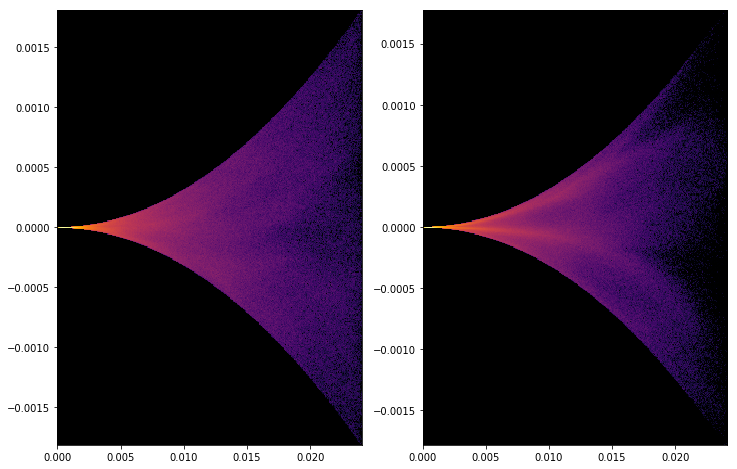

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))
ax1.hist2d(R, Lz1, bins = 401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax2.hist2d(R2, Lz2, bins = 401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
fig.show()

In [11]:
I1 = m_ges * R**2
I2 = m_ges2 * R2**2


/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


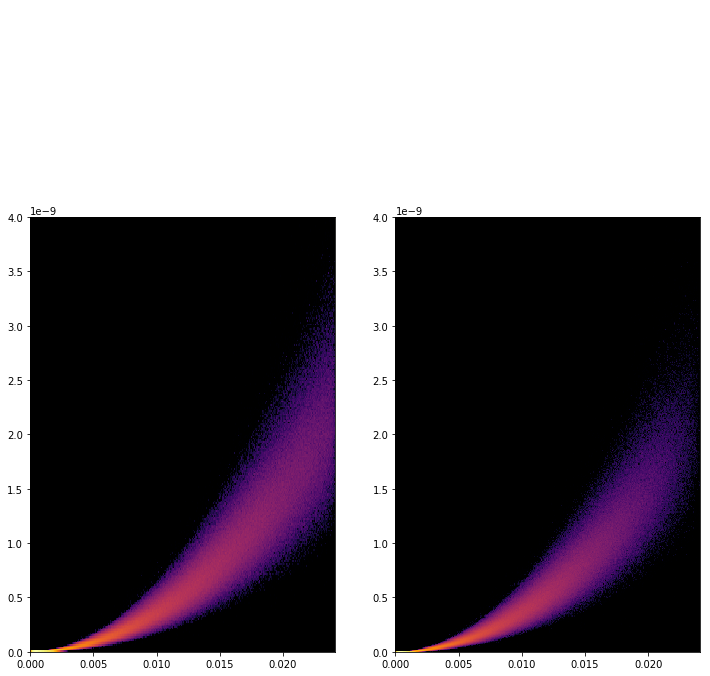

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))
ax1.hist2d(R, I1, bins = 401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax2.hist2d(R2, I2, bins = 401, norm=matplotlib.colors.LogNorm(), cmap = cmap)
ax1.set_ylim(0, 4e-9)
ax2.set_ylim(0, 4e-9)
fig.show()